# This is the actual production function(s)

`create_world.py` generates the full world. 

I'm a big fan of rouge-like games and RPGs. I'm also a big fan of data science tools for Python. This is my attempt to have it all. 

In [1]:
import pandas as pd
import numpy as np
import os
import django
import sys


sys.path.append("../..")
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "prodweb.settings")
django.setup()

sys.path.append("../")
import lib.create_world as c
import lib.drawMaps as draw
import lib.builders.culture as culture
import lib.builders.landscape as landscape
import lib.builders.towns as towns
import lib.builders.people as people
import lib.builders.nations as nations


pd.set_option("display.max_columns", 10)
pd.set_option("display.max_rows", 10)
%load_ext lab_black

## `timeit` functions to examin the runtime of each component. 

In [2]:
# %%timeit
# geo_world = c.the_first_age({})

In [3]:
geo_world = c.the_first_age({})

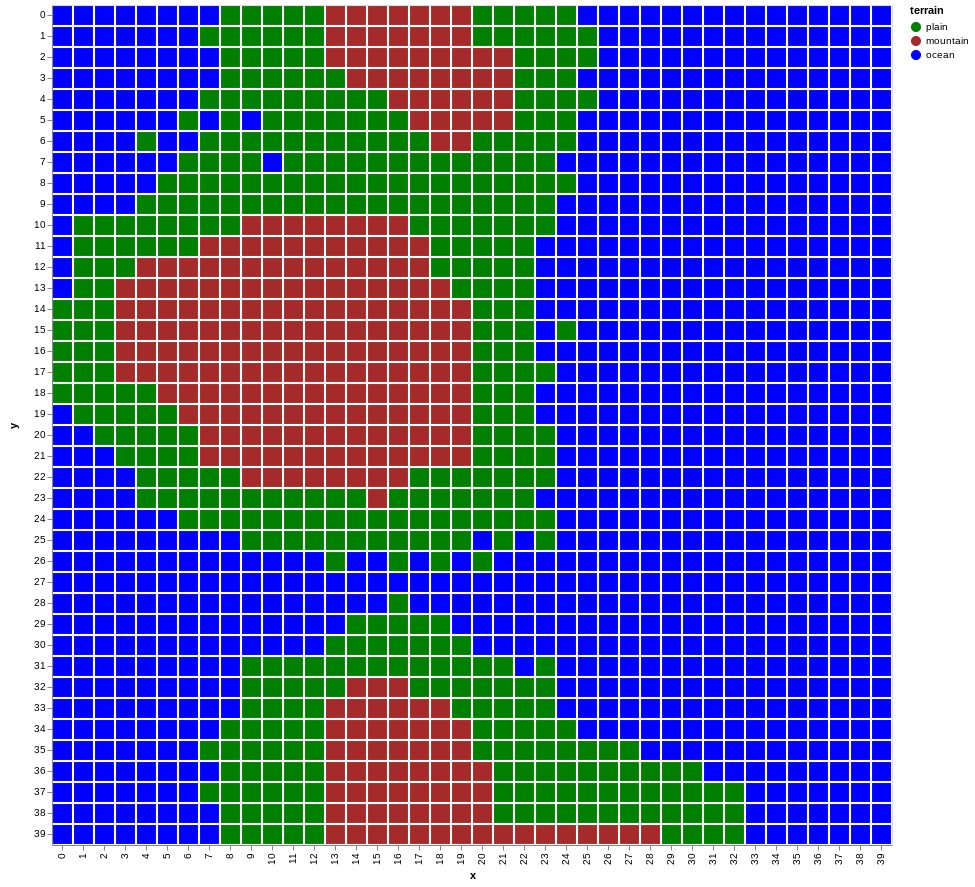

In [4]:
draw.drawTerrainTypes(geo_world.grid_elevation, geo_world.landscape)

# Second Age : Towns and Nations

In [5]:
geo_world.df_features

,y,rainfall,x,key,elevation,terrain
key,,,,,,
0:0,0,7.0,0,0:0,0.0,ocean
1:0,0,9.0,1,1:0,0.0,ocean
2:0,0,11.0,2,2:0,-1.0,ocean
3:0,0,14.0,3,3:0,-1.0,ocean
4:0,0,14.0,4,4:0,0.0,ocean
...,...,...,...,...,...,...
35:39,39,0.0,35,35:39,1.0,ocean
36:39,39,0.0,36,36:39,0.0,ocean
37:39,39,0.0,37,37:39,0.0,ocean


In [6]:
world = c.the_second_age(geo_world, {})

20:15 forest
10:4 plain
30:39 desert
10:4 town
30:39 town
24:5 desert
5:17 mountain
13:12 mountain
4:13 mountain
17:34 mountain
6:20 forest
28:36 desert
20:15 town
24:5 town
5:17 town
21:0 desert
5:17 town
4:13 town
6:20 town
28:36 town
21:0 town
23:31 plain
17:34 town
22:16 forest
5:17 town
4:13 town
17:34 town
6:20 town
19:23 plain
19:15 mountain
10:4 town
30:39 town
4:13 town
6:20 town
20:11 plain
13:15 mountain
14:2 mountain
6:20 town
19:23 town
20:11 town
13:15 town
7:35 desert
17:20 mountain
21:0 town
19:23 town
10:18 mountain
1:10 plain
15:2 mountain
13:13 mountain
10:4 town
5:17 town
21:0 town
13:15 town
7:35 town
10:18 town


In [7]:
world.df_features.loc["4:33"].terrain

'ocean'

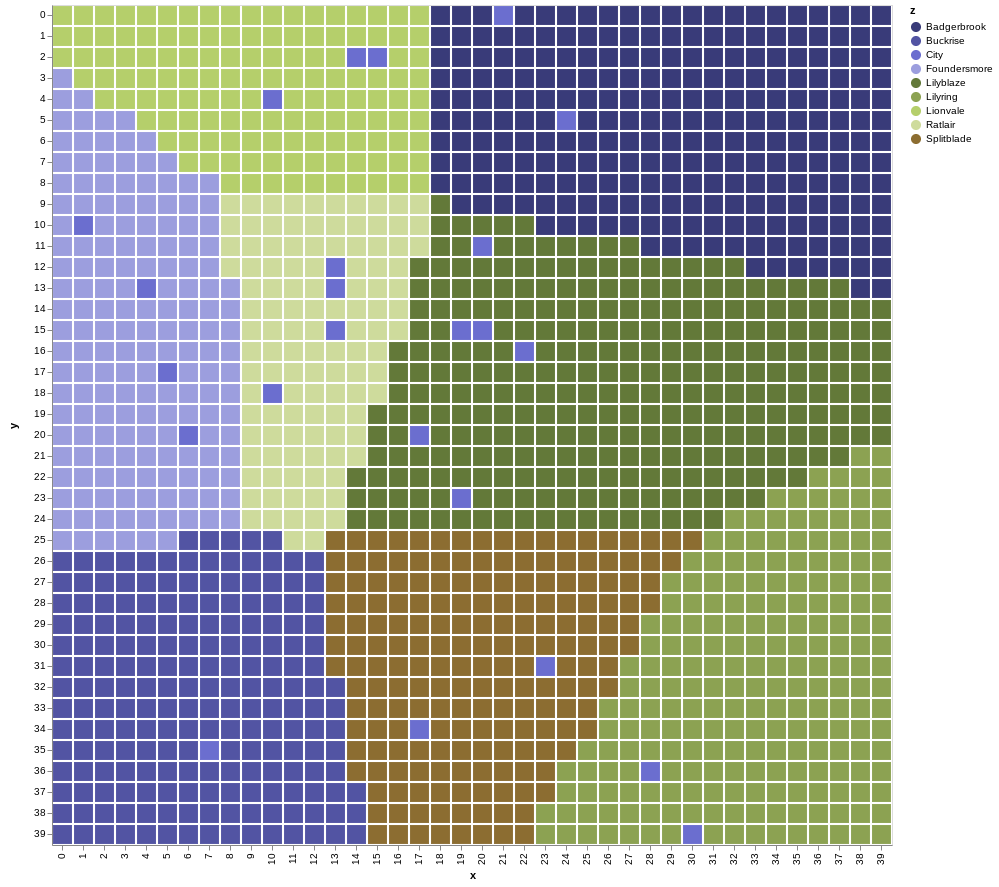

In [8]:
draw.drawboarders(world.df_features)

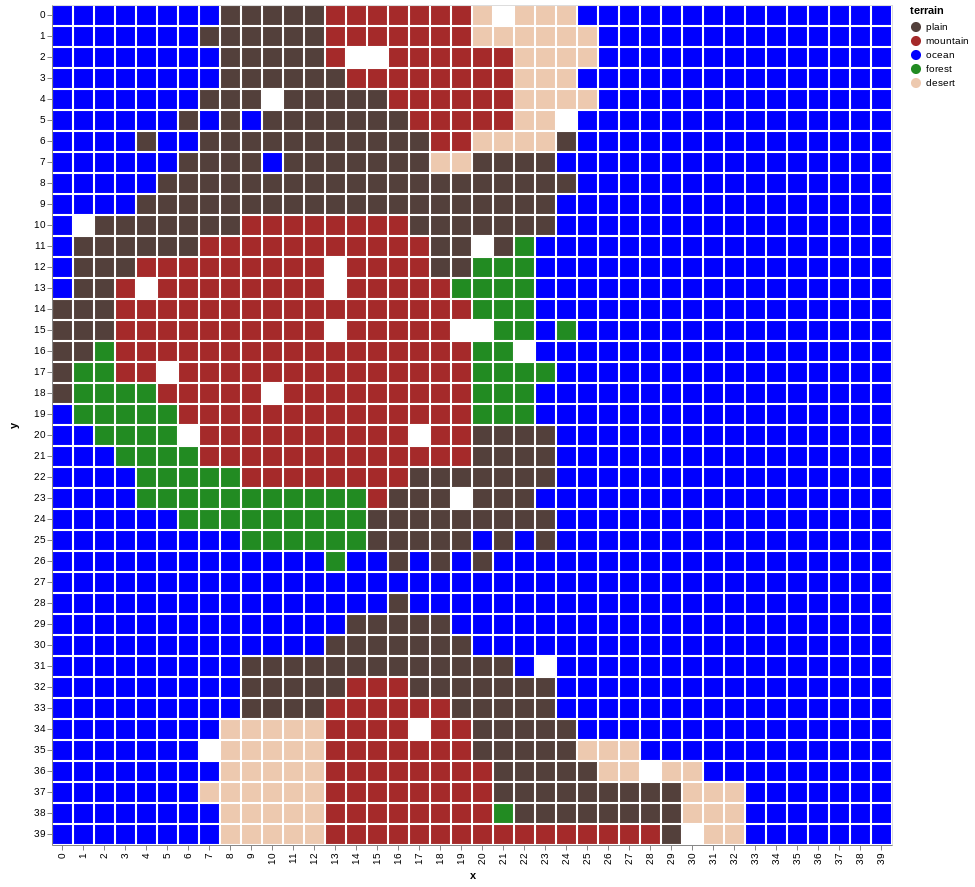

In [9]:
draw.drawterrainadvanced(world.df_features)

## The third age, conflict

In [10]:
world, events = c.the_third_age(world)

In [11]:
world

In [12]:
events

['0: a noble from [Nation of Foundersmore] was married to a noble in [Nation of Ratlair]',
 '1: a noble from [Nation of Lilyring] was married to a noble in [Nation of Splitblade]',
 '2: raiders from [Nation of Lionvale], plundered [Nation of Foundersmore, Nation of Ratlair, Nation of Buckrise]',
 '3: nothing happend during this period.',
 '4: nothing happend during this period.',
 '5: nothing happend during this period.',
 '6: a great temple was founded in the city of Rockrise in [Nation of Lilyring]',
 '7: bandits have set up camp in the None of [Nation of Lilyblaze]',
 '8: nothing happend during this period.',
 '9: bandits have set up camp in the None of [Nation of Lilyblaze]']

In [13]:
len(world.people)

55

In [14]:
world.people

[Drastud the Speaker of Purespike,
 Dacannan the Speaker of Warwish,
 Milandad the Speaker of Rockrise,
 Chinnit the commoner,
 Soharkolen the commoner,
 Herpid the Speaker of Tearrun,
 Scorandil the Speaker of Clearspring,
 Thackrumber the Speaker of Founderskeep,
 Staspek the Speaker of Gleammelt,
 Adayellis the Speaker of Fairglen,
 Foklunt the Speaker of Brinerail,
 Pegordace the Speaker of Rockcraft,
 Reppsa the commoner,
 Shefris the commoner,
 Thelnend the commoner,
 Atoldot the Speaker of Arthollow,
 Jarnolen the commoner,
 Dacanundle the commoner,
 Wranettech the commoner,
 Debrave the commoner,
 Eristor the commoner,
 Akivallomir the Speaker of Spinford,
 Shokellep the commoner,
 Mibband the Speaker of Snakefort,
 Quiklech the commoner,
 Pacha the commoner,
 Tangen the commoner,
 Dedreb the commoner,
 Doffoch the Speaker of Kingsforth,
 Adazennolen the Speaker of Warhaven,
 Erlordoth the commoner,
 Eleplnan the commoner,
 Lalnion the commoner,
 Rorandelle the commoner,
 Illia

In [15]:
world.df_features["feature"]

key
0:0      NaN
1:0      NaN
2:0      NaN
3:0      NaN
4:0      NaN
        ... 
35:39    NaN
36:39    NaN
37:39    NaN
38:39    NaN
39:39    NaN
Name: feature, Length: 1600, dtype: object

In [16]:
world.people

[Drastud the Speaker of Purespike,
 Dacannan the Speaker of Warwish,
 Milandad the Speaker of Rockrise,
 Chinnit the commoner,
 Soharkolen the commoner,
 Herpid the Speaker of Tearrun,
 Scorandil the Speaker of Clearspring,
 Thackrumber the Speaker of Founderskeep,
 Staspek the Speaker of Gleammelt,
 Adayellis the Speaker of Fairglen,
 Foklunt the Speaker of Brinerail,
 Pegordace the Speaker of Rockcraft,
 Reppsa the commoner,
 Shefris the commoner,
 Thelnend the commoner,
 Atoldot the Speaker of Arthollow,
 Jarnolen the commoner,
 Dacanundle the commoner,
 Wranettech the commoner,
 Debrave the commoner,
 Eristor the commoner,
 Akivallomir the Speaker of Spinford,
 Shokellep the commoner,
 Mibband the Speaker of Snakefort,
 Quiklech the commoner,
 Pacha the commoner,
 Tangen the commoner,
 Dedreb the commoner,
 Doffoch the Speaker of Kingsforth,
 Adazennolen the Speaker of Warhaven,
 Erlordoth the commoner,
 Eleplnan the commoner,
 Lalnion the commoner,
 Rorandelle the commoner,
 Illia